## Analyzing Tennis Performance Metrics: Predicting Player Success with Regression Models

#### Introduction

This project analyzes tennis performance data to explore relationships between different performance metrics and player earnings ("Winnings"). The goal is to identify key features that influence success and develop predictive models for winnings. By performing exploratory data analysis (EDA), feature selection, and regression modeling, we aim to provide actionable insights into player performance. The analysis includes single-variable, two-variable, and multi-variable regression models to evaluate the predictive power of selected features.

#### Workflow Process
1. **Data Loading**: Import the tennis performance dataset.
2. **EDA**: Explore the data structure, check for missing values, and analyze correlations among features.
3. **Feature Analysis**: Identify key features with significant relationships to the outcome variable (Winnings).
4. **Regression Modeling**: Develop and evaluate single-variable, two-variable, and multi-variable regression models.
5. **Visualization**: Generate scatter plots and trendlines for actual vs. predicted values.
6. **Recommendations**: Provide insights and actionable strategies based on findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [2]:
# Load the data
data = pd.read_csv("tennis_stats.csv")

#### Exploratory Data Analysis (EDA)

Data overview

In [3]:
print("Data Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nDisplay Data:")
display(data)
print("\nColumns names:")
print(data.columns.to_list)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed 

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264



Columns names:
<bound method IndexOpsMixin.tolist of Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')>


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


Correlation heatmap to see quickly the correlation between variables

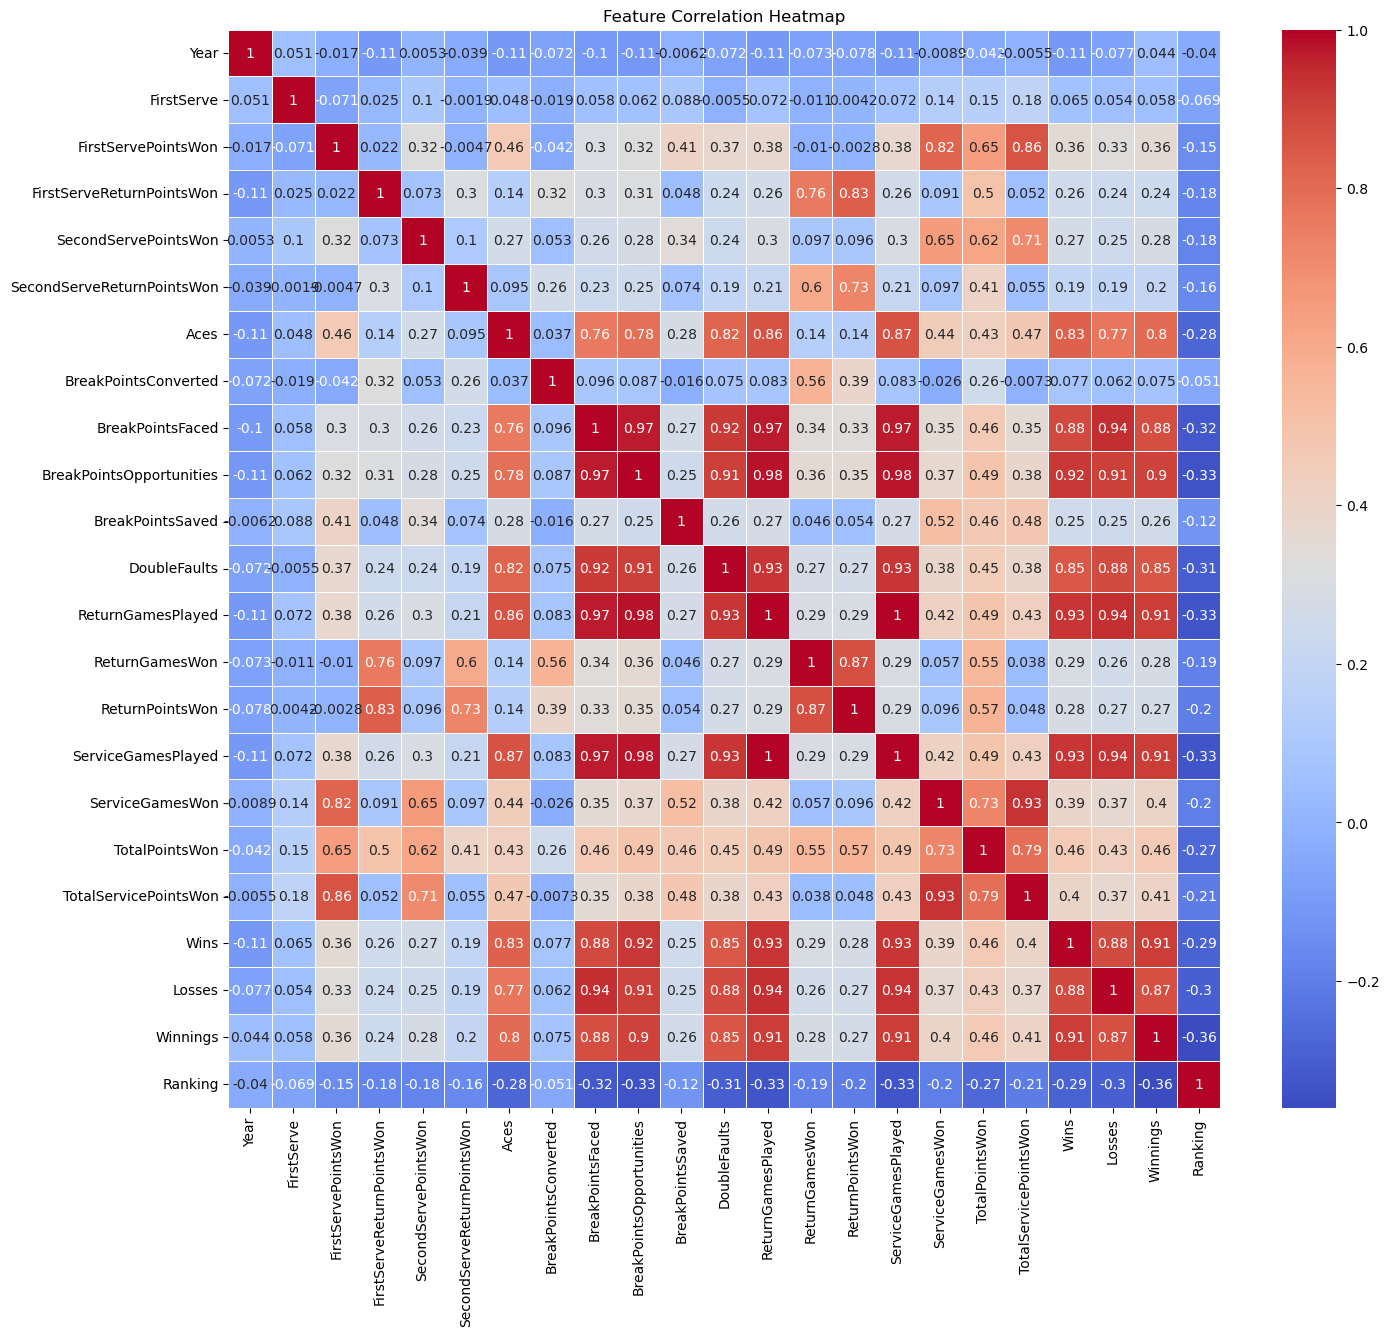

In [22]:
numerical_columns= data.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Pairwise relationships between some key features and outcome

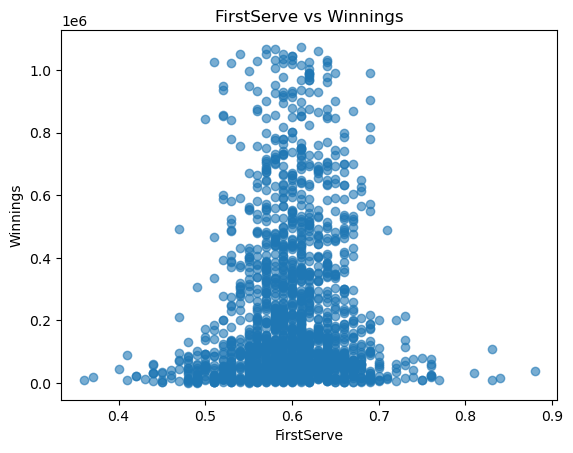

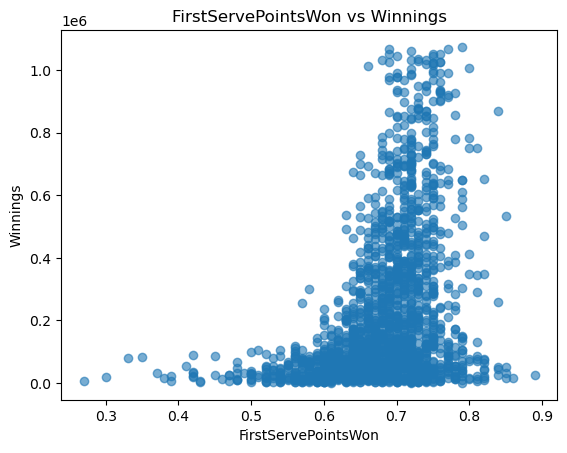

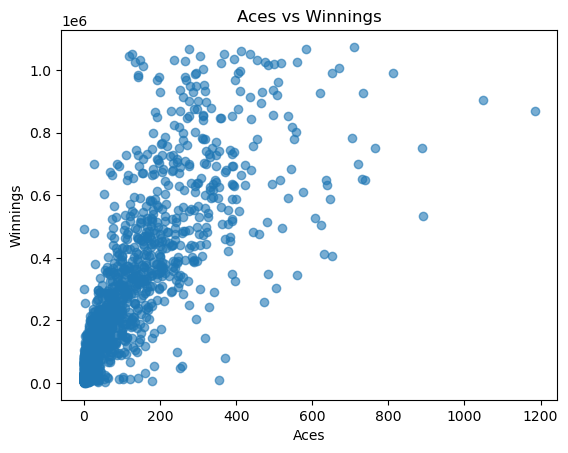

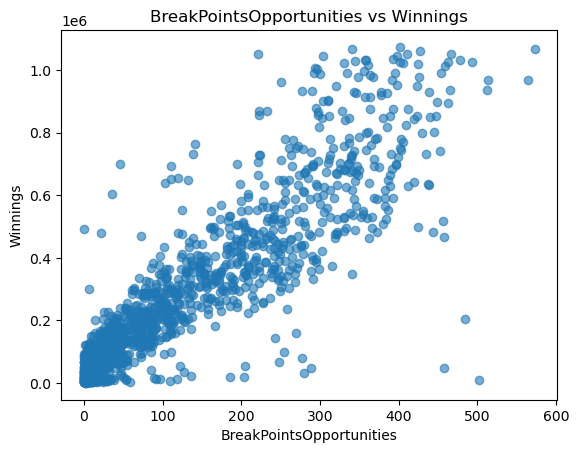

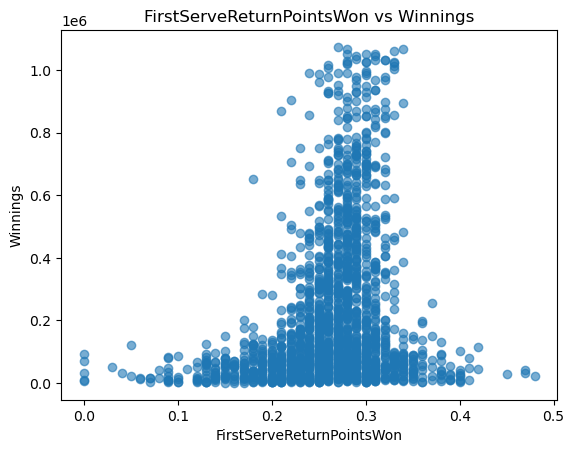

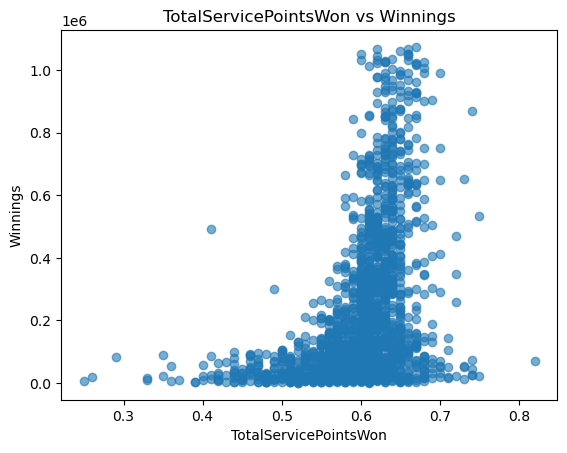

In [6]:
features_to_plot = ['FirstServe', 'FirstServePointsWon', 'Aces', 'BreakPointsOpportunities', 'FirstServeReturnPointsWon', 'TotalServicePointsWon']
for feature in features_to_plot:
    plt.scatter(data[feature], data['Winnings'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Winnings")
    plt.title(f"{feature} vs Winnings")
    plt.show()

#### Regression Analysis
Because we will be comparing different features against the same outcome, fir we will define this second one because will no change.

In [7]:
# Define outcome variable and features
outcome = data['Winnings']

- Single-variable regression: First Serve Return Points Won

Firs tServe Return Points Won Model:
R-squared: 0.0436
RMSE: 237791.8530


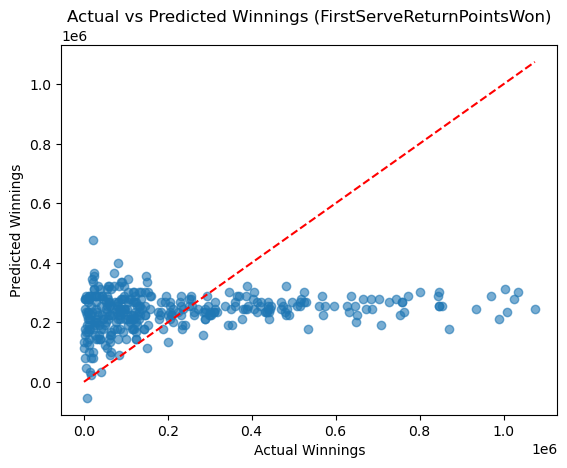

In [8]:
feature = data[['FirstServeReturnPointsWon']]
feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size=0.8, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(feature_train, outcome_train)
predictions = model.predict(feature_test)

# calculation
print("Firs tServe Return Points Won Model:")
#print("This feature was chosen because it reflects a critical turnin point players can gain an advantage depending if the first service was well executed or not, which likely correlates with winnings.")
print(f"R-squared: {model.score(feature_test, outcome_test):.4f}")
#print(f"RMSE: {mean_squared_error(outcome_test, predictions, squared=False):.4f}")
rmse = root_mean_squared_error(outcome_test, predictions)
print(f"RMSE: {rmse:.4f}")

#plot
plt.scatter(outcome_test, predictions, alpha=0.6)
plt.plot([outcome_test.min(), outcome_test.max()], [outcome_test.min(), outcome_test.max()], 'r--')
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.title("Actual vs Predicted Winnings (FirstServeReturnPointsWon)")
plt.show()

- Single-variable regression: BreakPointsOpportunities

BreakPointsOpportunities Model:
This feature was chosen because it reflects critical moments in matches where players can gain an advantage, which likely correlates with winnings.
R-squared Score Model: 0.7866
RMSE: 112335.2992


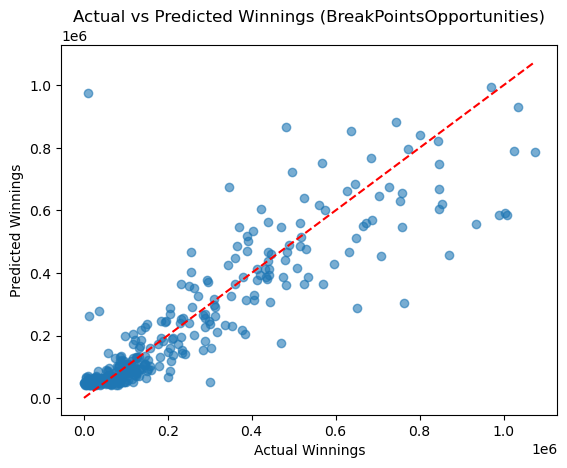

In [9]:
feature = data[['BreakPointsOpportunities']]
feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size=0.8, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(feature_train, outcome_train)
predictions = model.predict(feature_test)

# calculation
print("BreakPointsOpportunities Model:")
print("This feature was chosen because it reflects critical moments in matches where players can gain an advantage, which likely correlates with winnings.")
print(f"R-squared Score Model: {model.score(feature_test, outcome_test):.4f}")
#print(f"RMSE: {mean_squared_error(outcome_test, predictions, squared=False):.4f}")
rmse = root_mean_squared_error(outcome_test, predictions)
print(f"RMSE: {rmse:.4f}")

#plot
plt.scatter(outcome_test, predictions, alpha=0.6)
plt.plot([outcome_test.min(), outcome_test.max()], [outcome_test.min(), outcome_test.max()], 'r--')
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.title("Actual vs Predicted Winnings (BreakPointsOpportunities)")
plt.show()

- Two-variable regression: BreakPointsOpportunities and FirstServeReturnPointsWon

Two-variable Model:
By combining BreakPointsOpportunities and FirstServeReturnPointsWon, we capture both strategic opportunities and defensive performance, offering a more comprehensive view of factors influencing winnings.
R-squared Score Model: 0.7893
RMSE: 111610.6819


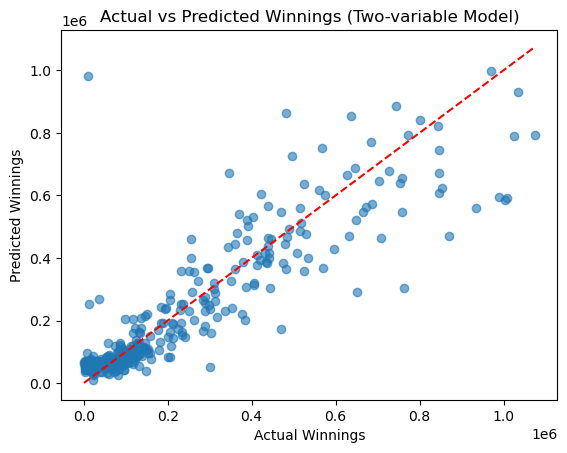

In [10]:
features = data[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8, test_size=0.2, random_state=42)

model.fit(features_train, outcome_train)
two_var_predictions = model.predict(features_test)

print("Two-variable Model:")
print("By combining BreakPointsOpportunities and FirstServeReturnPointsWon, we capture both strategic opportunities and defensive performance, offering a more comprehensive view of factors influencing winnings.")
print(f"R-squared Score Model: {model.score(features_test, outcome_test):.4f}")
#print(f"RMSE: {mean_squared_error(outcome_test, two_var_predictions, squared=False):.4f}")
rmse = root_mean_squared_error(outcome_test, two_var_predictions)
print(f"RMSE: {rmse:.4f}")

plt.scatter(outcome_test, two_var_predictions, alpha=0.6)
plt.plot([outcome_test.min(), outcome_test.max()], [outcome_test.min(), outcome_test.max()], 'r--')
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.title("Actual vs Predicted Winnings (Two-variable Model)")
plt.show()

- Multi-variable regression

Multi-variable Model:
The selected features provide all the data available to predict winnings effectively.
R-squared Score Model: 0.8268
RMSE: 101188.1625


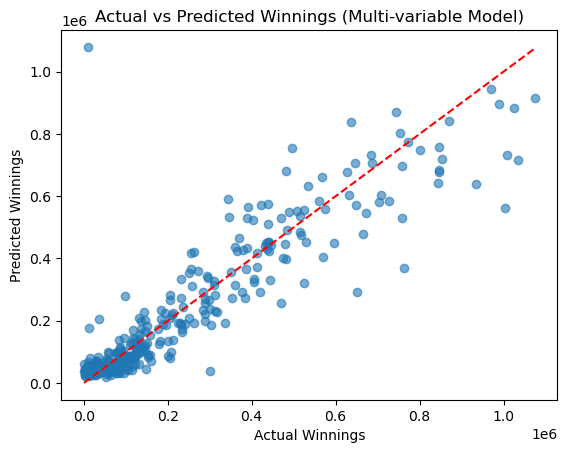

In [11]:
selected_features = ['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon', 'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities', 'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon', 'TotalServicePointsWon']
features = data[selected_features]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8, random_state=42)

model.fit(features_train, outcome_train)
multi_predictions = model.predict(features_test)

print("Multi-variable Model:")
print("The selected features provide all the data available to predict winnings effectively.")
print(f"R-squared Score Model: {model.score(features_test, outcome_test):.4f}")
# print(f"RMSE: {mean_squared_error(outcome_test, multi_predictions, squared=False):.4f}")
rmse = root_mean_squared_error(outcome_test, multi_predictions)
print(f"RMSE: {rmse:.4f}")


plt.scatter(outcome_test, multi_predictions, alpha=0.6)
plt.plot([outcome_test.min(), outcome_test.max()], [outcome_test.min(), outcome_test.max()], 'r--')
plt.xlabel("Actual Winnings")
plt.ylabel("Predicted Winnings")
plt.title("Actual vs Predicted Winnings (Multi-variable Model)")
plt.show()

#### Recommendations
- Focus on improving BreakPointsOpportunities and FirstServeReturnPointsWon to maximize earnings.
- Develop player training strategies to enhance these metrics, as they are strong predictors of success.
- Explore advanced techniques (e.g., polynomial regression) for more accurate modeling.
- Conduct further analysis on additional data sources, such as player fitness or match conditions, to enhance predictions.

#### Conclusion
1. This analysis highlights the significance of several performance metrics in determining player success. Among the models, the two-variable regression using BreakPointsOpportunities and FirstServeReturnPointsWon performed better due to its balance of offensive and defensive insights.

2. The findings suggest that focusing on critical match moments (BreakPointsOpportunities) and defensive strength (FirstServeReturnPointsWon) can provide actionable strategies to improve performance and earnings. While simple linear models offer quick insights, leveraging multi-variable approaches is recommended for a nuanced understanding and more accurate predictions of tennis earnings.

